In [1]:
import yfinance as yf

columns = ['AAPL', 'GLD']

f_df = yf.download(columns, start='2010-01-01')['Adj Close'].round(4)
f_df

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,GLD
Date,,
2010-01-04,6.4707,109.80
2010-01-05,6.4819,109.70
2010-01-06,6.3788,111.51
2010-01-07,6.3670,110.82
2010-01-08,6.4094,111.37
...,...,...
2024-06-10,193.1200,213.54
2024-06-11,207.1500,214.15
2024-06-12,213.0700,214.72


In [20]:
gold_df = f_df[['GLD']]
gold_df

Ticker,GLD
Date,
2010-01-04,109.80
2010-01-05,109.70
2010-01-06,111.51
2010-01-07,110.82
2010-01-08,111.37
...,...
2024-06-10,213.54
2024-06-11,214.15
2024-06-12,214.72


In [21]:
gld_train = gold_df['GLD'][:int(0.8 * len(gold_df))]
gld_test = gold_df['GLD'][int(0.8 * len(gold_df)):]

<Axes: xlabel='Date'>

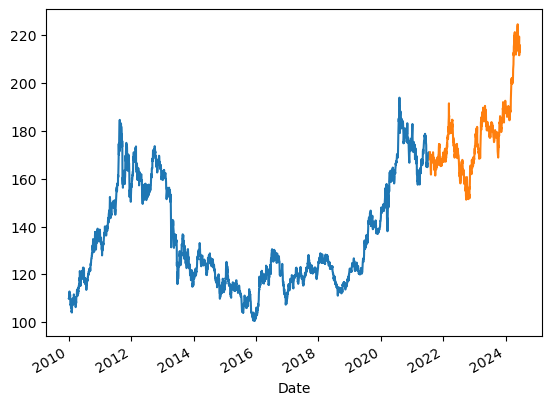

In [22]:
gld_train.plot()
gld_test.plot()

In [23]:
from pmdarima.arima import ndiffs
# KPSS (Kwaiatkowski-Phillps-Schmidt)
# 치분을 진행하는 것이 필요할 지 결정하기 위해 사용하는 한 가지 검정 방법
# 영가설(귀무가설)을 "데이터에 정상성이 나타난다" 라고 설정한뒤,
# 영가설이 거짓이라는 증거를 찾는 알고리즘이다. 
kpass_diffs = ndiffs(gld_train, alpha=0.05, test='kpss', max_d=9)
adf_diffs = ndiffs(gld_train, alpha=0.05, test='adf', max_d=9)
pp_diffs = ndiffs(gld_train, alpha=0.05, test='pp', max_d=9)

n_diffs = max(kpass_diffs, adf_diffs, pp_diffs)
print(f'금 d = {n_diffs}')

금 d = 1


In [24]:
import pmdarima as pm

model = pm.auto_arima(y=gld_train, d=1, start_p=0, max_p=3, start_q=0,
                     max_q=3, m=1, seasonal=True, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10254.529, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10256.529, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10256.529, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10253.127, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10258.529, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.706 seconds


In [25]:
model.fit(gld_train)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
gld_train

Date
2010-01-04    109.80
2010-01-05    109.70
2010-01-06    111.51
2010-01-07    110.82
2010-01-08    111.37
               ...  
2021-07-19    169.61
2021-07-20    169.39
2021-07-21    168.76
2021-07-22    169.09
2021-07-23    168.56
Name: GLD, Length: 2909, dtype: float64

In [27]:
prediction = model.predict(n_periods = len(gld_train))
prediction

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2909    168.56
2910    168.56
2911    168.56
2912    168.56
2913    168.56
         ...  
5813    168.56
5814    168.56
5815    168.56
5816    168.56
5817    168.56
Length: 2909, dtype: float64

In [28]:
# 신뢰구간 -> return_conf_int
prediction, conf_int = model.predict(n_periods=2, return_conf_int=True) 
print(conf_int)
print(prediction)
# 결과적으로 신뢰구간의 평균값으로 예측한다.

[[165.79633583 171.32366417]
 [164.65158865 172.46841135]]
2909    168.56
2910    168.56
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [30]:
prediction, conf_int = model.predict(n_periods=2, return_conf_int=True) 
print(conf_int)
print(prediction)

[[165.79633583 171.32366417]
 [164.65158865 172.46841135]]
2909    168.56
2910    168.56
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
prediction.tolist()[0]

168.56

In [32]:
# 실제 값을 알고 있을 때 사용
# 알 수 없는 데이터의 내용을 가지고 예측하는것이 아님.
def predict_one_step():
    prediction, conf_int = model.predict(n_periods=2, return_conf_int=True) 
    return (prediction.tolist()[0], conf_int.tolist()[0])

In [39]:
# 실제 값을 알고 있을 때 사용
# 알 수 없는 데이터의 내용을 가지고 예측하는것이 아님.
def predict_one_step():
    prediction, conf_int = model.predict(n_periods=2, return_conf_int=True) 
    return (prediction.tolist()[0], conf_int.tolist()[0])

In [40]:
p_list = [] # Prediction
conf_int_lower = [] # 신뢰구간 min
cont_int_upper = [] # 신뢰구간 max

for data in gld_test:
    p, c = predict_one_step()
    p_list.append(p)
    conf_int_lower.append(c[0])
    cont_int_upper.append(c[1])

    model.update(data)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [41]:
p_list = [] # Prediction
conf_int_lower = [] # 신뢰구간 min
cont_int_upper = [] # 신뢰구간 max

for data in gld_test:
    p, c = predict_one_step()
    p_list.append(p)
    conf_int_lower.append(c[0])
    cont_int_upper.append(c[1])

    model.update(data)

In [43]:
import pandas as pd

gld_predict_df = pd.DataFrame({"test" : gld_test, "pred" : p_list})
gld_predict_df

,test,pred
Date,,
2021-07-26,168.16,215.73
2021-07-27,168.44,168.16
2021-07-28,169.29,168.44
2021-07-29,171.17,169.29
2021-07-30,169.82,171.17
...,...,...
2024-06-10,213.54,211.60
2024-06-11,214.15,213.54
2024-06-12,214.72,214.15


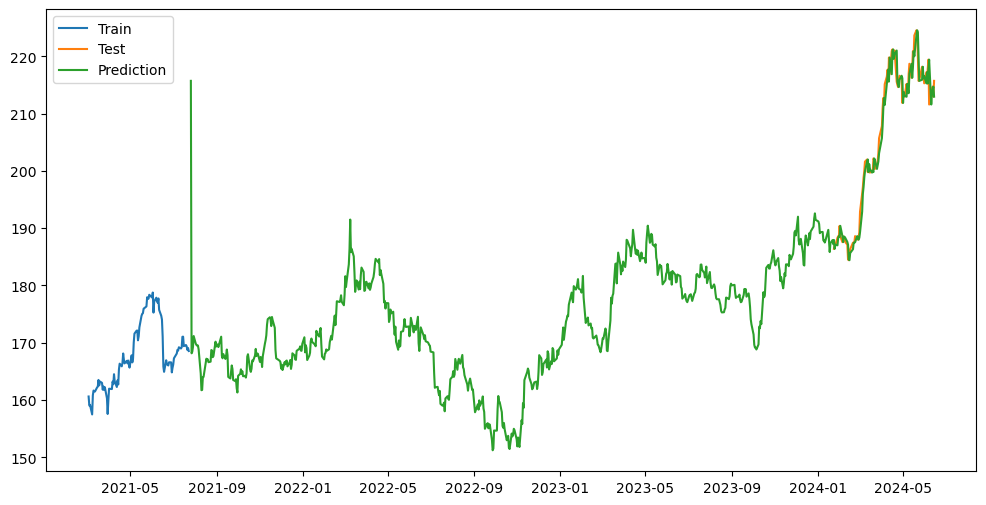

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(gld_train.iloc[-100:], label='Train')
plt.plot(gld_test.iloc[-100:], label='Test')
plt.plot(gld_predict_df.pred, label='Prediction')
plt.legend()
plt.show()

In [47]:
import numpy as np

def MAPE(y_test, y_pred) :
    return np.mean(np.abs((gld_test - y_pred) / gld_test)) * 100

print(f'MAPE (%): {MAPE(gld_test, p_list):.4f}')

MAPE (%): 0.7141


In [48]:
f_df

Ticker,AAPL,GLD
Date,,
2010-01-04,6.4707,109.80
2010-01-05,6.4819,109.70
2010-01-06,6.3788,111.51
2010-01-07,6.3670,110.82
2010-01-08,6.4094,111.37
...,...,...
2024-06-10,193.1200,213.54
2024-06-11,207.1500,214.15
2024-06-12,213.0700,214.72


### 딥러닝 - Propet 사용 

In [49]:
g_df = f_df['2022-01-01':]
g_df

Ticker,AAPL,GLD
Date,,
2022-01-03,179.7246,168.33
2022-01-04,177.4436,169.57
2022-01-05,172.7236,169.06
2022-01-06,169.8402,166.99
2022-01-07,170.0081,167.75
...,...,...
2024-06-10,193.1200,213.54
2024-06-11,207.1500,214.15
2024-06-12,213.0700,214.72


In [50]:
pre_a_df = g_df.reset_index()
pre_a_df

Ticker,Date,AAPL,GLD
0,2022-01-03,179.7246,168.33
1,2022-01-04,177.4436,169.57
2,2022-01-05,172.7236,169.06
3,2022-01-06,169.8402,166.99
4,2022-01-07,170.0081,167.75
...,...,...,...
611,2024-06-10,193.1200,213.54
612,2024-06-11,207.1500,214.15
613,2024-06-12,213.0700,214.72
614,2024-06-13,214.2400,212.97


In [51]:
pre_b_df = pre_a_df.drop(columns='AAPL')
pre_b_df

Ticker,Date,GLD
0,2022-01-03,168.33
1,2022-01-04,169.57
2,2022-01-05,169.06
3,2022-01-06,166.99
4,2022-01-07,167.75
...,...,...
611,2024-06-10,213.54
612,2024-06-11,214.15
613,2024-06-12,214.72
614,2024-06-13,212.97


In [52]:
pre_b_df = pre_b_df.rename(columns={'Date':'ds'})
pre_b_df = pre_b_df.rename(columns={'GLD':'y'})
pre_b_df

Ticker,ds,y
0,2022-01-03,168.33
1,2022-01-04,169.57
2,2022-01-05,169.06
3,2022-01-06,166.99
4,2022-01-07,167.75
...,...,...
611,2024-06-10,213.54
612,2024-06-11,214.15
613,2024-06-12,214.72
614,2024-06-13,212.97


In [53]:
from prophet import Prophet

model = Prophet().fit(pre_b_df)

14:23:02 - cmdstanpy - INFO - Chain [1] start processing
14:23:02 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
future = model.make_future_dataframe(periods=270)

forecast = model.predict(future)

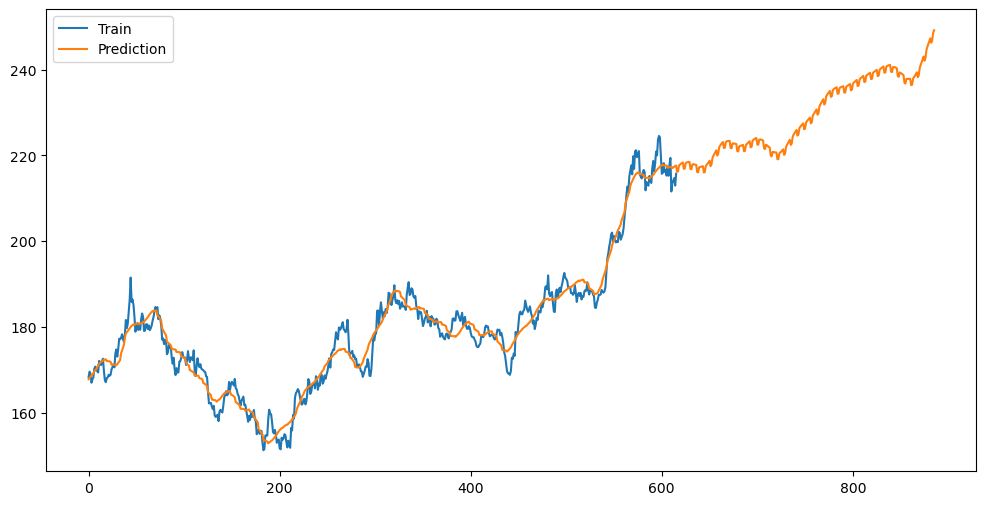

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(pre_b_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


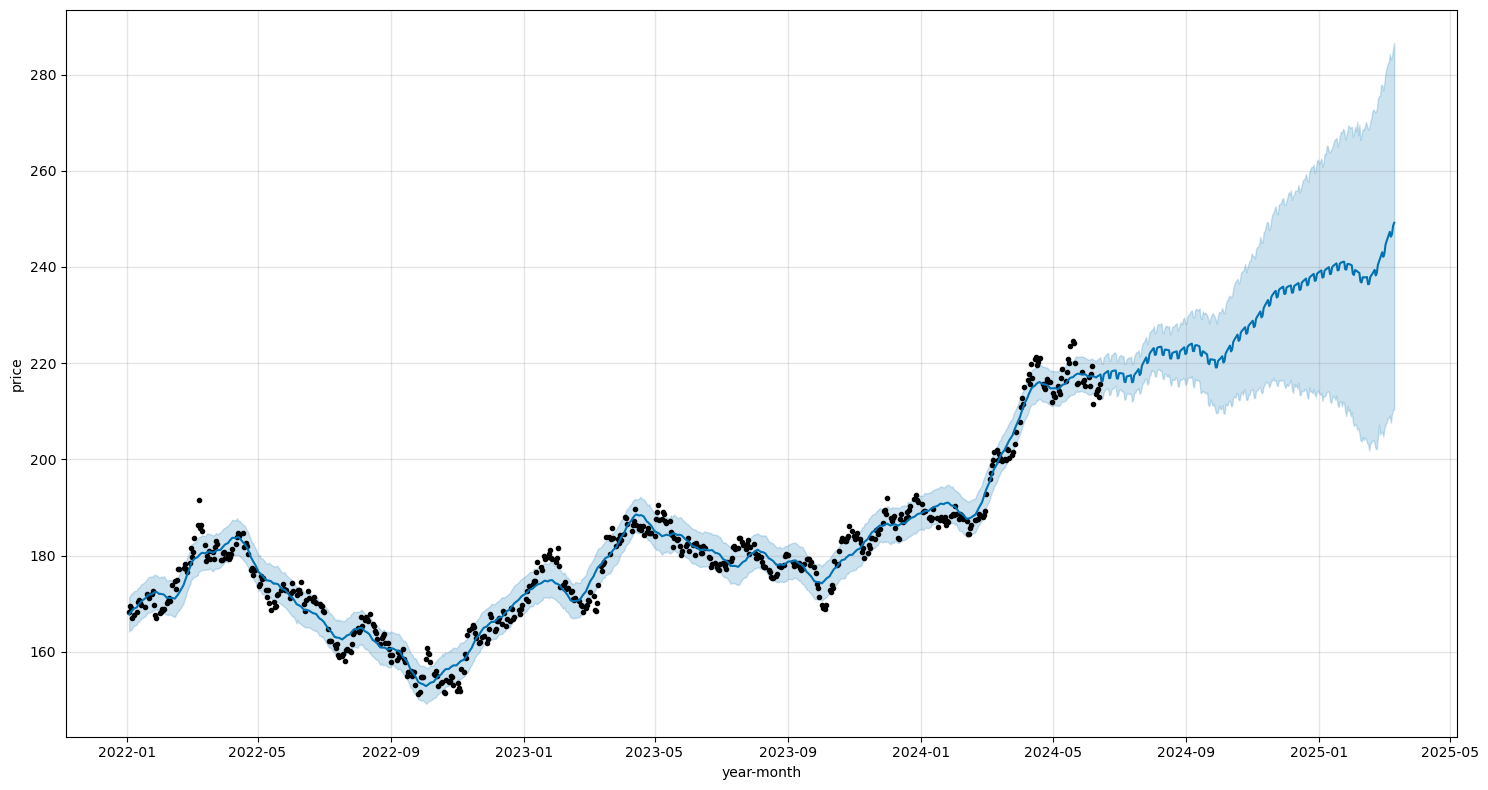

In [56]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

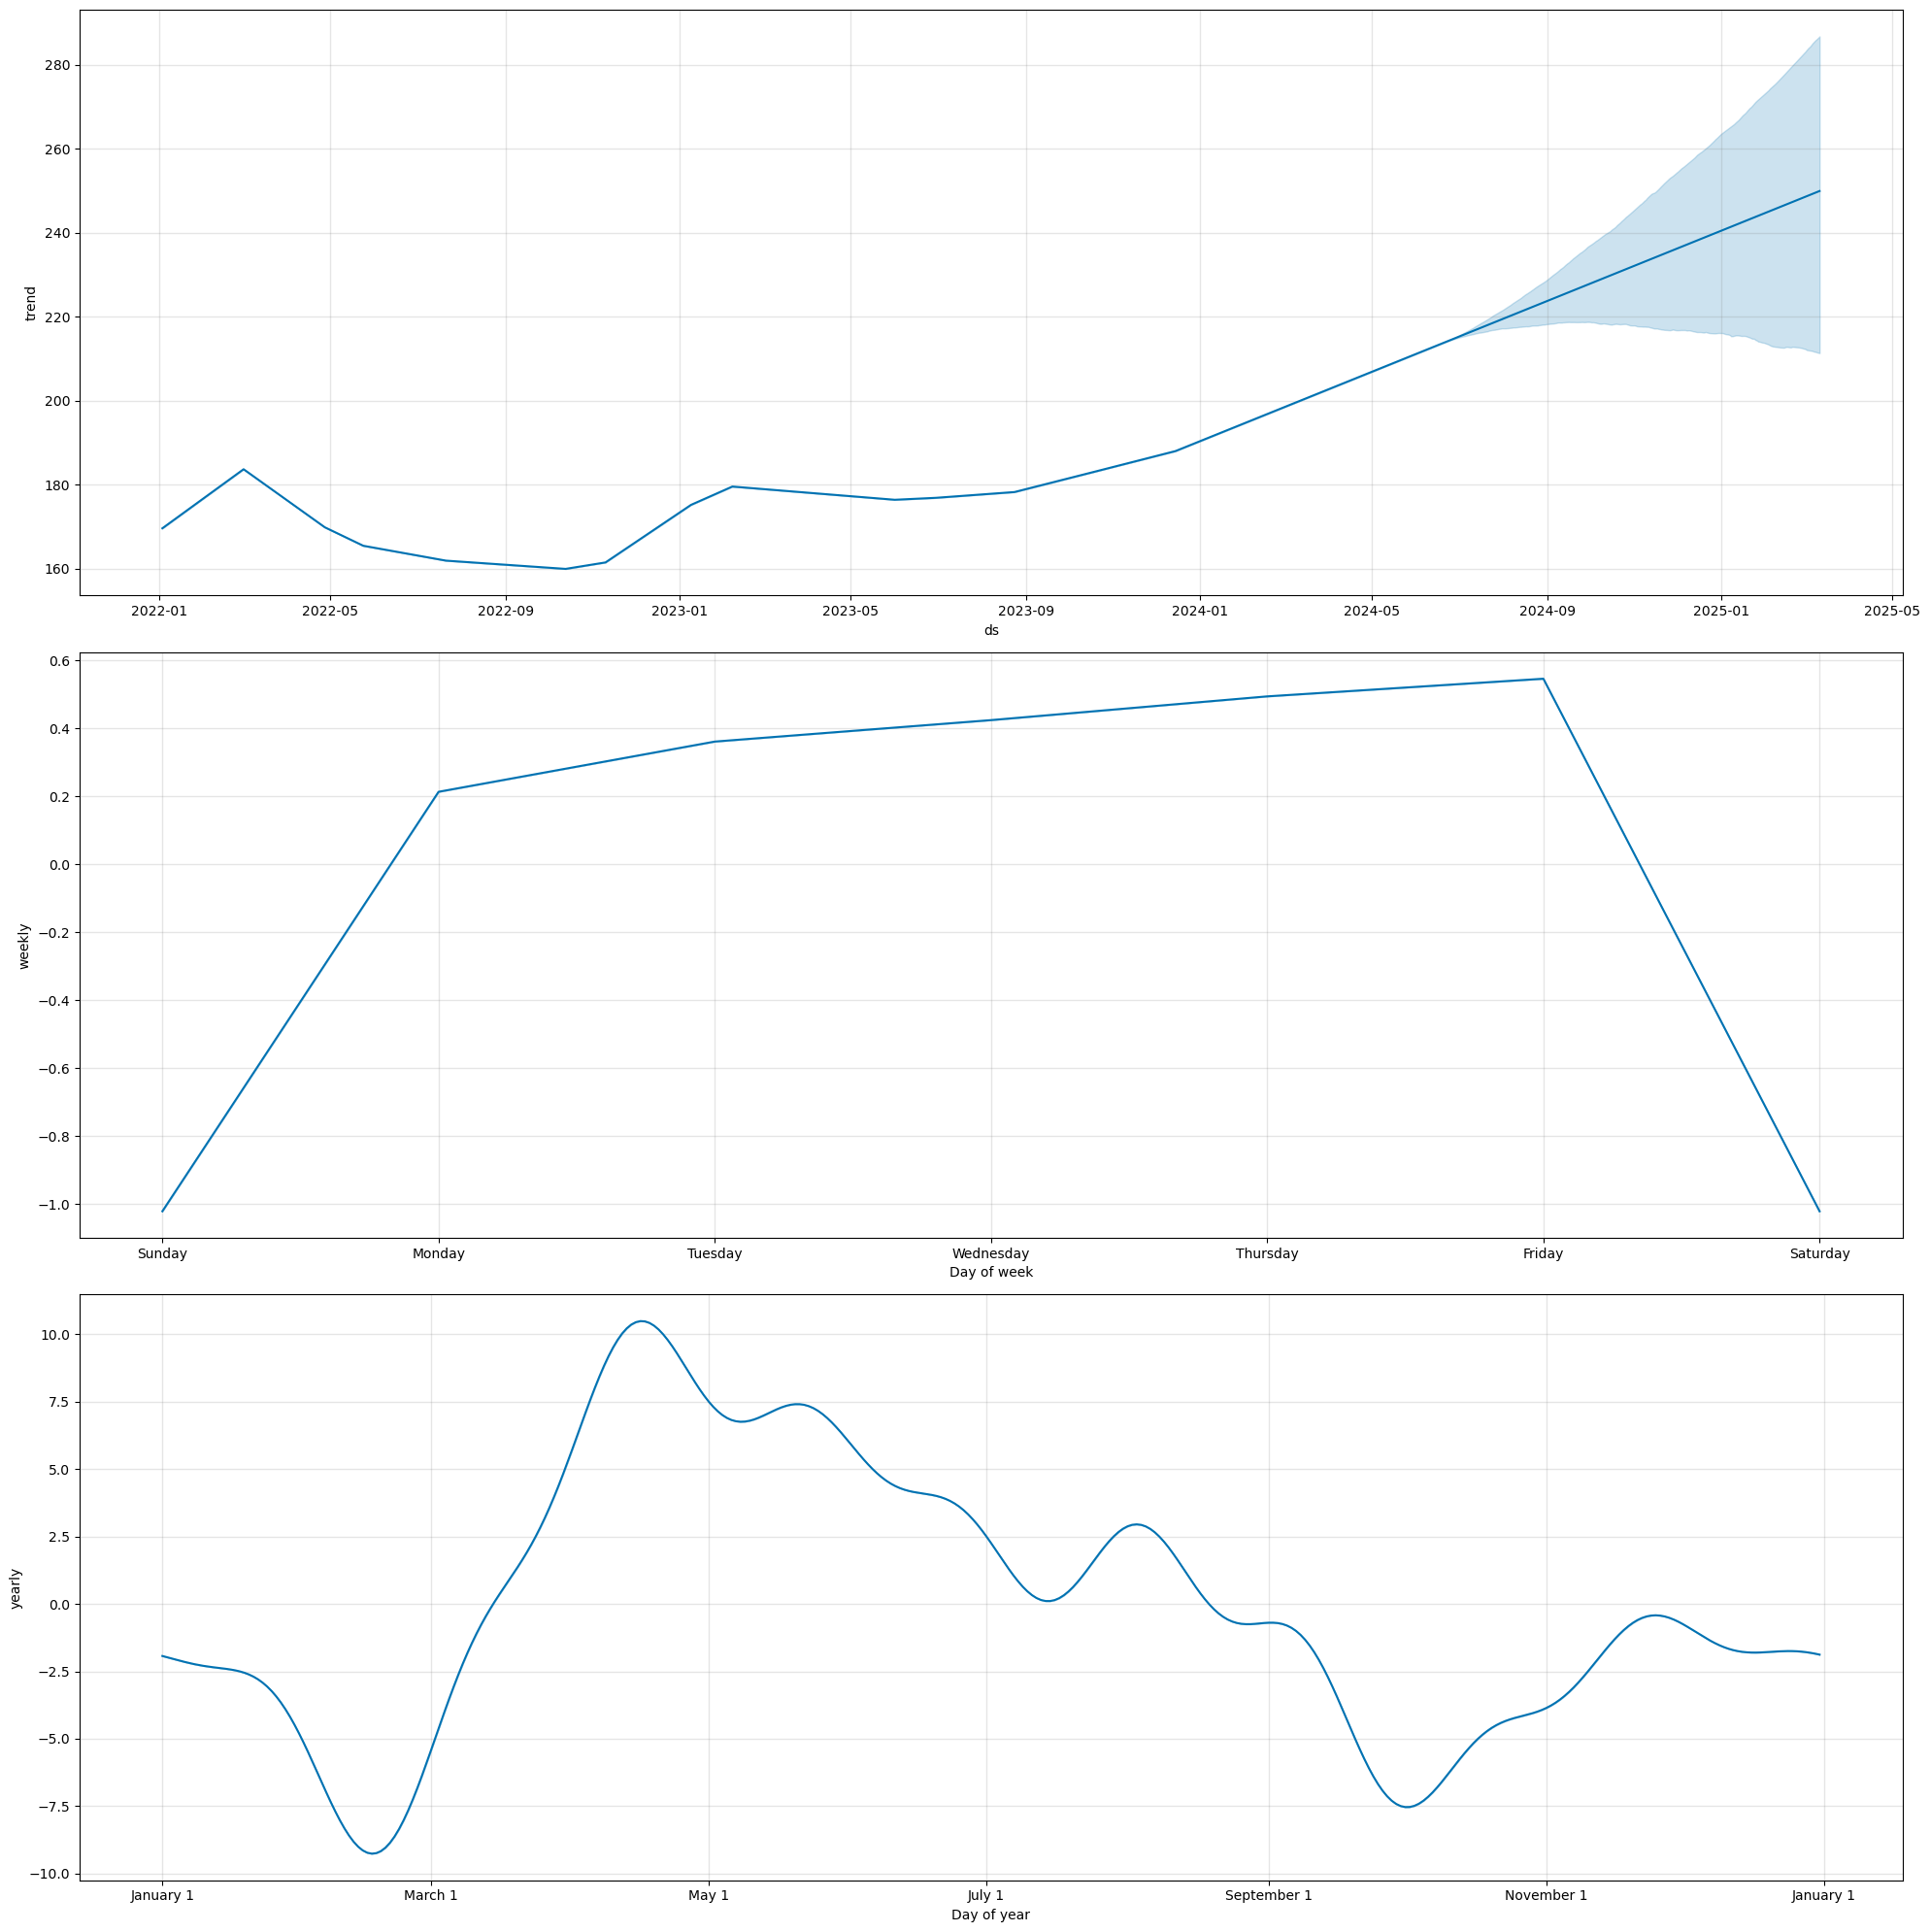

In [57]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

In [58]:
pre_b_df

Ticker,ds,y
0,2022-01-03,168.33
1,2022-01-04,169.57
2,2022-01-05,169.06
3,2022-01-06,166.99
4,2022-01-07,167.75
...,...,...
611,2024-06-10,213.54
612,2024-06-11,214.15
613,2024-06-12,214.72
614,2024-06-13,212.97


In [59]:
train_df = pre_b_df.iloc[:int(len(pre_b_df) * 0.8)]
train_df

Ticker,ds,y
0,2022-01-03,168.33
1,2022-01-04,169.57
2,2022-01-05,169.06
3,2022-01-06,166.99
4,2022-01-07,167.75
...,...,...
487,2023-12-11,183.59
488,2023-12-12,183.49
489,2023-12-13,187.63
490,2023-12-14,188.73


In [60]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_b_df) * 0.8)
test_len = int(len(pre_b_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_b_df.iloc[: train_len]
test_df = pre_b_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

14:24:18 - cmdstanpy - INFO - Chain [1] start processing
14:24:18 - cmdstanpy - INFO - Chain [1] done processing
14:24:20 - cmdstanpy - INFO - Chain [1] start processing
14:24:20 - cmdstanpy - INFO - Chain [1] done processing
14:24:22 - cmdstanpy - INFO - Chain [1] start processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing
14:24:24 - cmdstanpy - INFO - Chain [1] start processing
14:24:24 - cmdstanpy - INFO - Chain [1] done processing
14:24:26 - cmdstanpy - INFO - Chain [1] start processing
14:24:26 - cmdstanpy - INFO - Chain [1] done processing
14:24:29 - cmdstanpy - INFO - Chain [1] start processing
14:24:29 - cmdstanpy - INFO - Chain [1] done processing
14:24:31 - cmdstanpy - INFO - Chain [1] start processing
14:24:31 - cmdstanpy - INFO - Chain [1] done processing
14:24:33 - cmdstanpy - INFO - Chain [1] start processing
14:24:33 - cmdstanpy - INFO - Chain [1] done processing
14:24:35 - cmdstanpy - INFO - Chain [1] start processing
14:24:36 - cmdstanpy - INFO - Chain [1]

In [61]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
3,0.05,10.00,additive,0.051951
1,0.05,0.10,additive,0.052109
0,0.05,0.05,additive,0.052122
2,0.05,1.00,additive,0.052347
5,0.10,0.10,additive,0.053377
7,0.10,10.00,additive,0.053917
4,0.10,0.05,additive,0.054215
6,0.10,1.00,additive,0.054387
19,5.00,10.00,additive,0.056525
20,10.00,0.05,additive,0.056526


In [62]:
model = Prophet(changepoint_prior_scale=0.5, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='additive')

model.fit(pre_b_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

14:25:37 - cmdstanpy - INFO - Chain [1] start processing
14:25:37 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2022-11-17,161.920844,159.044340,164.915900
222,2022-11-18,162.315719,159.231198,165.288195
223,2022-11-21,162.903224,159.729279,165.801011
224,2022-11-22,163.305519,160.251695,166.311627
225,2022-11-23,163.627343,160.847187,166.490115
...,...,...,...,...
976,2025-06-10,201.199281,-61.718977,437.501090
977,2025-06-11,200.974916,-65.800091,439.918767
978,2025-06-12,200.751003,-67.030917,440.818502
979,2025-06-13,200.512124,-69.445982,441.876580


In [63]:
b_df = pre_b_df.copy()
b_df.set_index('ds', inplace=True)

forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

b_df.index = pd.to_datetime(b_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

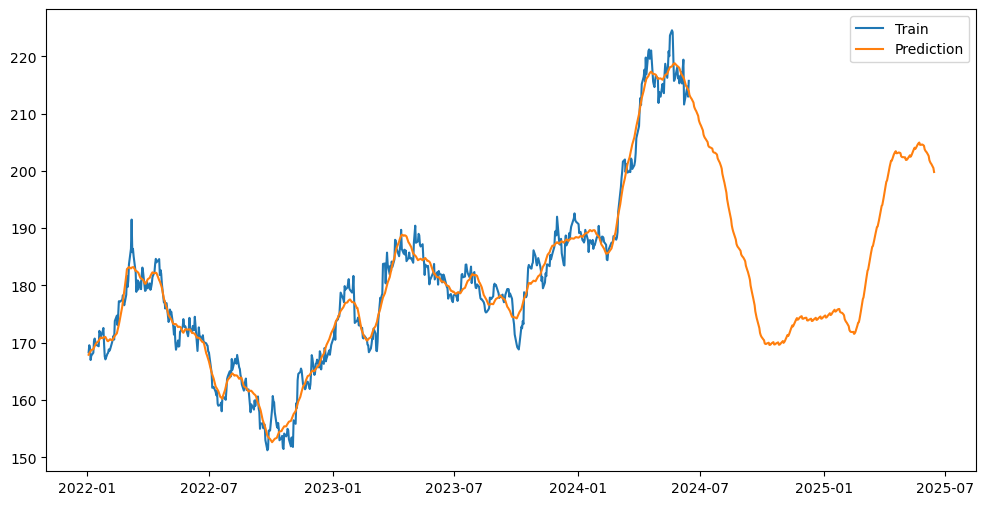

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(b_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


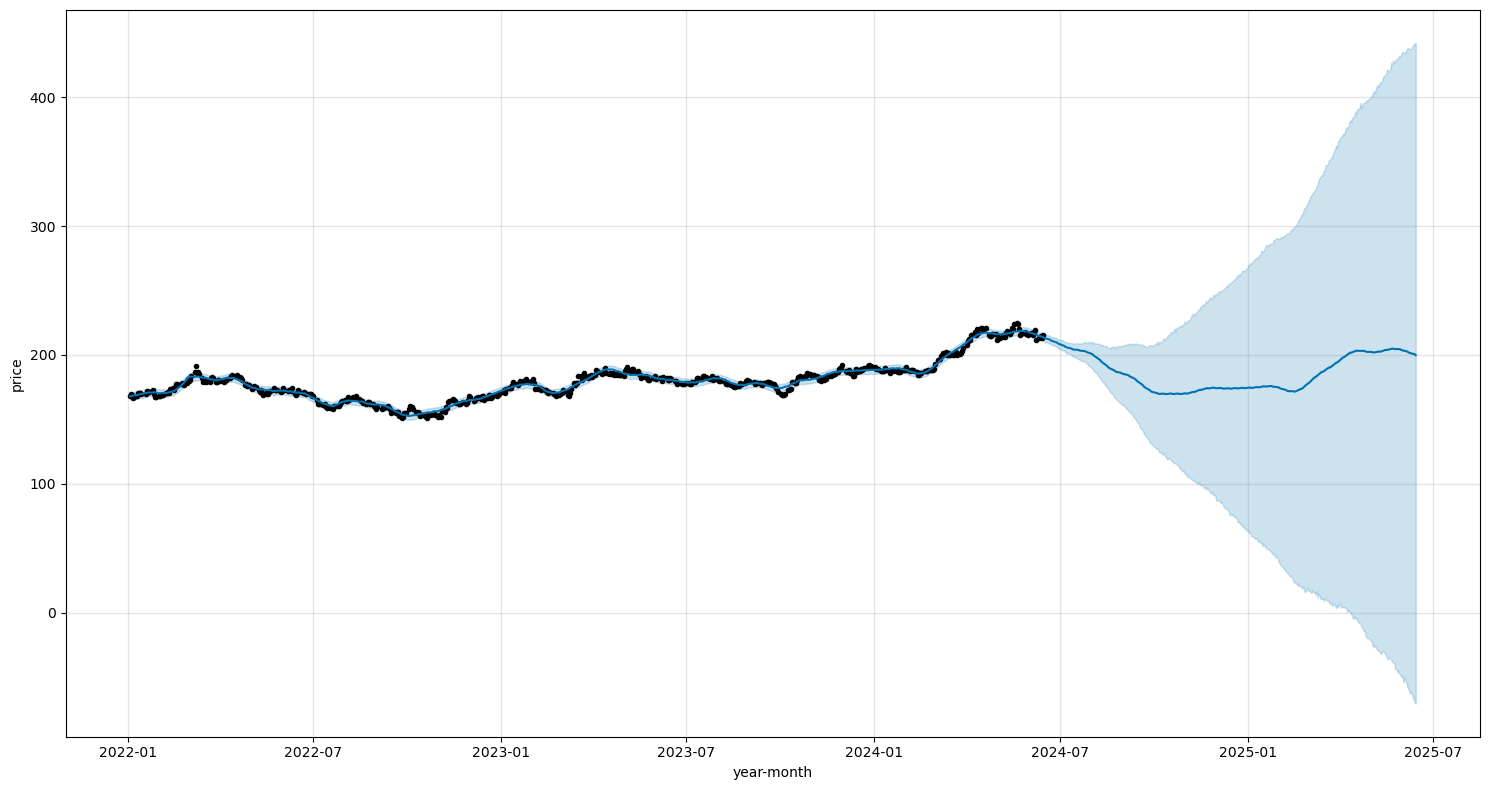

In [65]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects inste

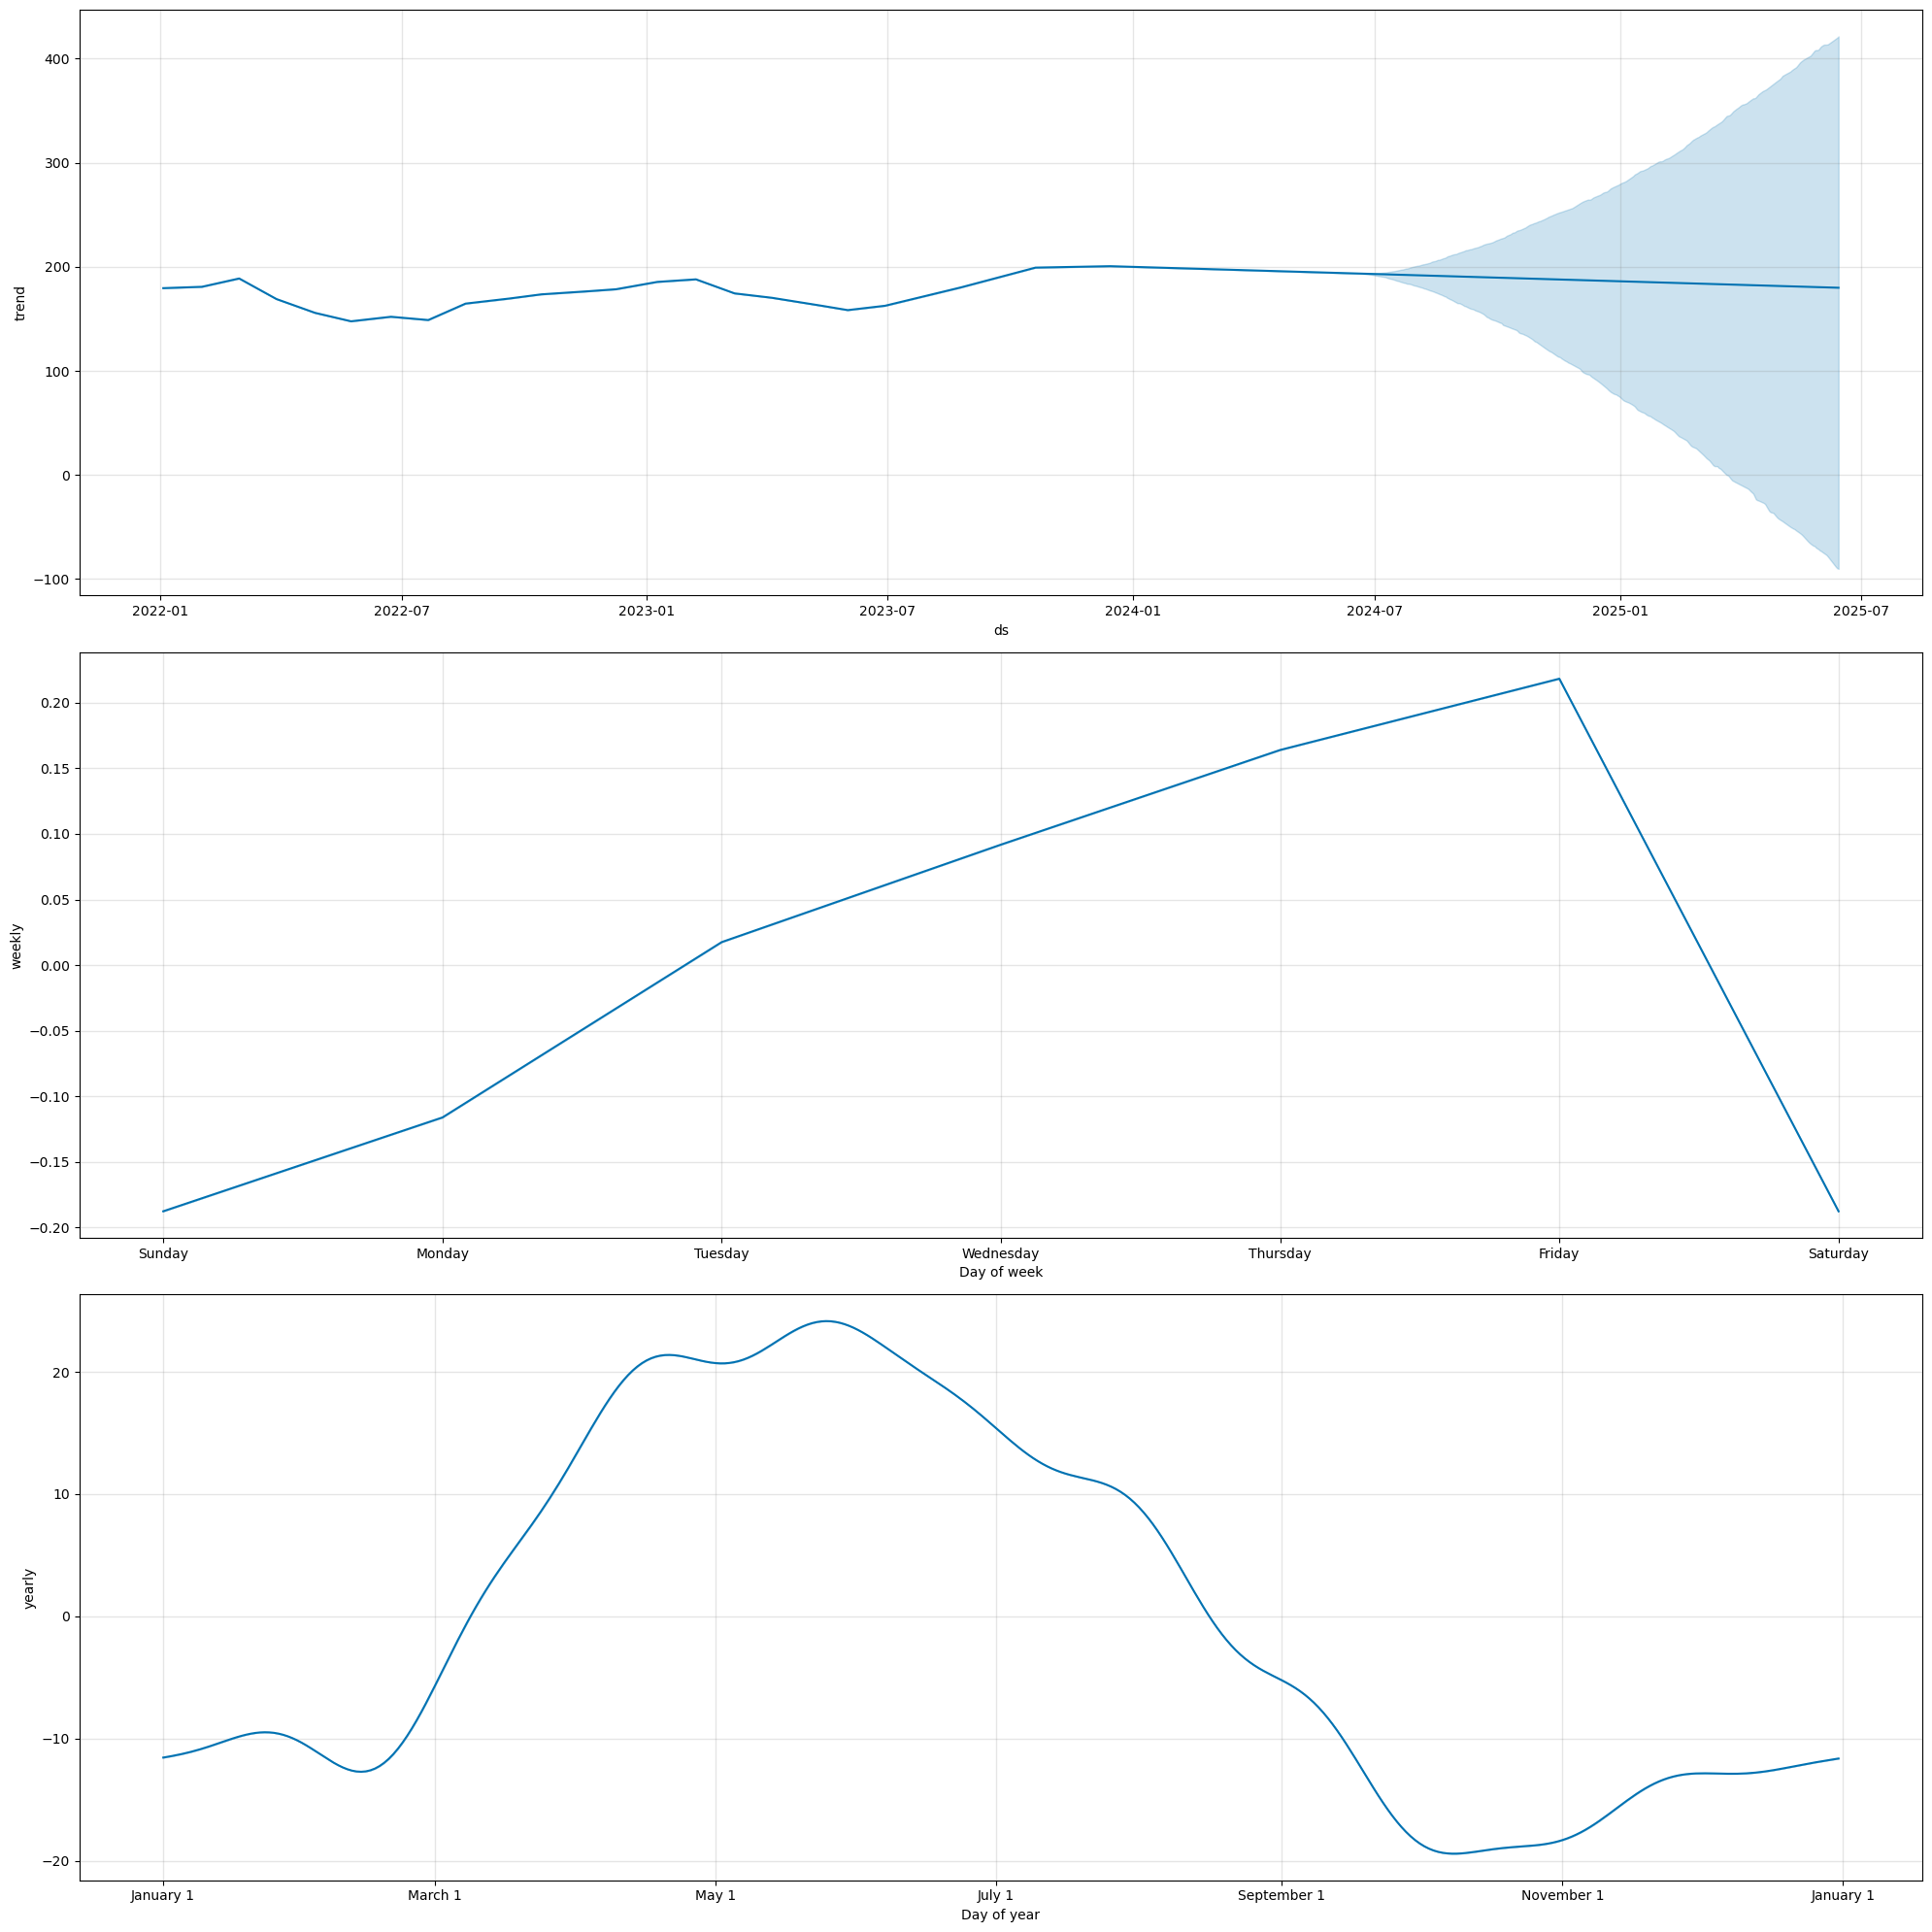

In [66]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()